# Práctico 4 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

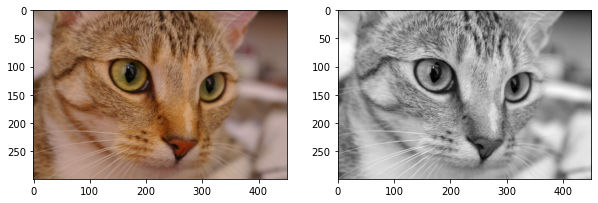

In [3]:
img_rgb = imageio.imread('imageio:chelsea.png')/255
img = rgb2yiq(img_rgb)[:,:,0]

_, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

# 1. Transformada Discreta de Fourier 

1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. Mostrar el módulo en escala logarítmica
2. Encuentre una transformada para la amplitud y una para la fase que permita guardar el espectro en imágenes de 8 bit perdiendo la menor cantidad de información posible
3. Implementar la transformada inversa que convierta el espectro guardado en imágenes de 8 bit en la imagen original 
4. Calcular el error medio cuadrático de ir y volver a la imagen de 8bit
5. Guardar tp4.png como tp4_amp.png y tp4_phase.png. Corregir la tp4_amp.png con MS Paint o similar. Leer el espectro modificado y reconstruir la imagen.

In [4]:
def transformada_fourier_2d(img): 
    M, N = img.shape
    return  np.fft.fftshift(np.fft.fft2(img)/(M*N))

def anti_transformada_fourier_2d (img_back):
    return  np.fft.ifft2(img_back)


300 451


Text(0.5, 1.0, 'Módulo en escala log')

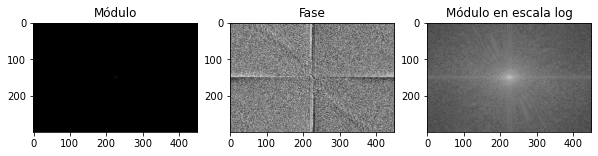

In [5]:
# Problema 1:
N, M = img.shape
print(N,M)
x = np.fft.fftshift(np.fft.fft2(img)/(M*N)) # FFT 2D

#  módulo y fase 
Xm = np.abs(x)
Xp = np.angle(x)

# módulo en escala log
Xm_log= np.log10(Xm)


fig, axes = plt.subplots(1, 3, figsize=(10,5))
axes[0].imshow(Xm, 'gray')
axes[0].set_title('Módulo')
axes[1].imshow(Xp, 'gray')
axes[1].set_title('Fase')
axes[2].imshow(Xm_log, 'gray')
axes[2].set_title('Módulo en escala log')


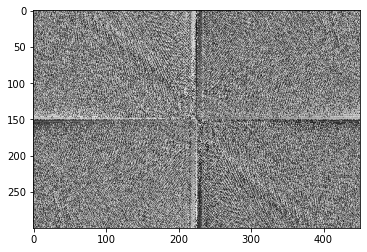

In [6]:
#Problema 2:

# función para el módulo 
a = 10000
X_logt = np.log((a*Xm)+1)/np.log(a+1)
#X_logt = np.uint8(X_logt*255)

#función para la fase
Xp_t = (Xp+np.pi)/(2*np.pi)
#plt.imshow(Xp_t,'gray')
#Xp_t = np.log(np.pi*Xp+10)/np.log(np.pi+10)
plt.imshow(Xp_t,'gray')

#GUARDO los espectros
imageio.imsave('imgm_log.png',  np.uint8(X_logt*255),'png' )
imageio.imsave('imgp_log.png', np.uint8(Xp_t*255),'png')







In [7]:
X_logt.min()

0.0001484443616429813

In [8]:
#Problema 3:

X_s_m = imageio.imread('imgm_log.png')/255 # Módulo
X_s_p = imageio.imread('imgp_log.png')/255 # Fase

X_s_t_m = (np.exp(X_s_m*np.log(a+1))-1)/a # anti-tranformación Módulo

X_s_t_p = (np.exp(X_s_p*np.log(np.pi+10))-10)/np.pi       # anti-tranformación Fase
#X_s_t_p= (X_s_p )*(2*np.pi) 
#Módulo
error = rmse(Xm,X_s_t_m)
print ('Error Medio Cuadrático de ir y volver a la imagen de 8bit(módulo):',error)

#Fase
error = rmse(Xp,X_s_t_p)
print ('Error Medio Cuadrático de ir y volver a la imagen de 8bit(fase):',error)


f_ishift = np.fft.ifftshift(X_logt)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)




Error Medio Cuadrático de ir y volver a la imagen de 8bit(módulo): 8.179707039869749e-06
Error Medio Cuadrático de ir y volver a la imagen de 8bit(fase): 1.9059358617354472


512 512


Text(0.5, 1.0, 'Módulo transformado')

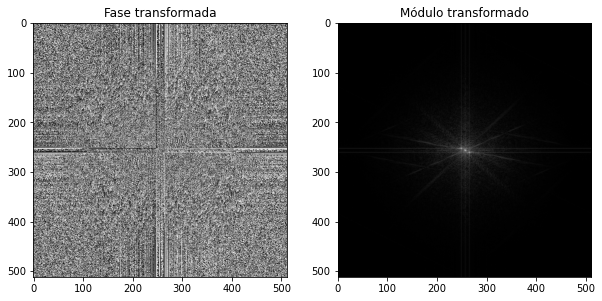

In [9]:
#Problema 5:
#A)
img_1 = plt.imread('tp4.png')
N, M = img_1.shape
print(N,M)
espectro = np.fft.fftshift(np.fft.fft2(img_1)/(M*N)) #FFT 2D

#  módulo y fase 
e_abs = np.abs(espectro)
e_p = np.angle(espectro)


# módulo Transformado
e_abs_log =np.log((10000*e_abs)+1)/np.log(10000+1)

#Transformación del espectro de la fase
#e_fase_t = np.log(np.pi*e_p+10)/np.log(np.pi+10)
e_fase_t= (e_p)/(2*np.pi)


imageio.imsave('tp4_amp.png', np.uint8(e_abs_log*255 )) #GUARDO EL ESPECTRO DEL MÓDULO EN .PNG
imageio.imsave('tp4_phase.png', np.uint8(e_fase_t*255 )) #GUARDO EL ESPECTRO DE LA FASE EN .PNG
fig, axes = plt.subplots(1, 2, figsize=(10,5))# PLOT
axes[0].imshow(e_fase_t, 'gray')
axes[0].set_title('Fase transformada')
axes[1].imshow(e_abs_log, 'gray')
axes[1].set_title('Módulo transformado')



Text(0.5, 1.0, 'Original')

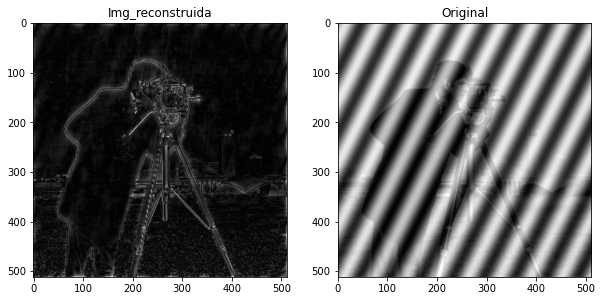

In [23]:
#B)

e_abs_exp = imageio.imread('tp4_amp_paint.png')/255
e_abs_exp = e_abs_exp[:,:,0]
#print(e_abs_exp.shape)
#plt.imshow(e_abs_exp,'gray')



F = np.abs(e_abs_exp)*np.exp(1j*e_p)
e_ishift = np.fft.ifft2(F)*(M*N) # IFFT 2D
img = np.abs(e_ishift)


fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.uint8(img),'gray')
axes[0].set_title('Img_reconstruida')
axes[1].imshow(img_1, 'gray')
axes[1].set_title('Original')



